# CHUẨN HÓA DỮ LIỆU (NORMALIZATION)
---
Thuật toán học máy hoạt động trên các con số và không biết con số đó đại diện cho cái gì. Trọng lượng 10 gram và giá 10 đô la đại diện cho 2 thứ hoàn toàn khác nhau, nhưng đối với một mô hình học máy cả 2 features này đều giống nhau. 

Nhiều thuật toán học máy làm việc tốt khi các thuộc tính (features) ở trên phạm vi tương tự gần nhau và gần với phân phối chuẩn.

* **Scale:** có nghĩa là thay đổi phạm vi của giá trị, dạng của phân phối không thay đổi. Scale data sẽ thực hiện xử lý dữ liệu có cùng tỷ lệ lên như là dữ liệu gốc chỉ là phạm vi sẽ nhỏ hơn. Phạm vi sau khi scale thường thiết lập trong khoảng 0 tới 1.

* **Standardize**: Có nghĩa là thay đổi giá trị để đưa về phân phối chuẩn có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1. 



## **A.Scaling Data:**
---
Một số phương pháp thực hiện scaling thuộc tính bao gồm:
1. Min - Max scaler
2. Standard scaler
3. Max Abs scaler
4. Robust Scaler
5. Quantile Transformer scaler
6. Power Transformer scaler
7. Unit Vector scaler

### 1. Min-Max scaler
---
MinMax Scaler là một trong số những phương pháp scaling data phổ biến nhất. Phương pháp này sẽ thực hiện việc chuyển đổi các đặc tính về một phạm vi thường là [0,1] hoặc [-1, 1] trong trường hợp giá trị âm.

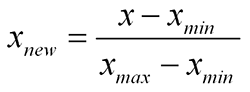


In [2]:
#Tạo dữ liệu mẫu 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'Age': [2, 18, 35, 10,20, 35, 40, 11],
                   'Weight': [18,50,55,30, 53, 56, 67, 32]},
                   index = ['ID1','ID2','ID2','ID4','ID5','ID6','ID7','ID8'])
print(df)

     Age  Weight
ID1    2      18
ID2   18      50
ID2   35      55
ID4   10      30
ID5   20      53
ID6   35      56
ID7   40      67
ID8   11      32


In [3]:
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


        WEIGHT  PRICE
Orange   0.625   0.00
Apple    1.000   0.50
Banana   0.250   0.25
Grape    0.000   1.00


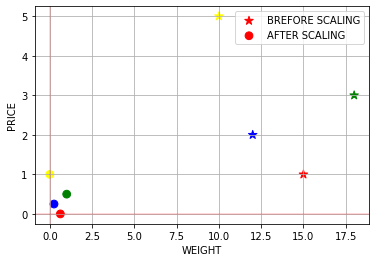

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df), 
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
print(df1)

ax = df.plot.scatter(x='WEIGHT', 
                     y='PRICE',
                    color=['red','green','blue','yellow'], 
                     marker = '*',
                     s=80, 
                     label='BREFORE SCALING')

df1.plot.scatter(x='WEIGHT', 
                y='PRICE',
                color=['red','green','blue','yellow'],
                 marker = 'o',
                 s=60,
                 label='AFTER SCALING', 
                 ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)
plt.grid(True)

In [ ]:
print(scaler.scale_)

[0.125 0.25 ]


### 2. StandardScaler
---

          WEIGHT     PRICE
Orange  0.412393 -1.183216
Apple   1.402136  0.169031
Banana -0.577350 -0.507093
Grape  -1.237179  1.521278


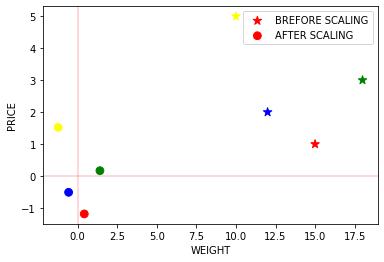

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

print(df2)
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df2.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

In [ ]:
df.describe()

,WEIGHT,PRICE
count,4.00,4.000000
mean,13.75,2.750000
std,3.50,1.707825
min,10.00,1.000000
25%,11.50,1.750000
50%,13.50,2.500000
75%,15.75,3.500000
max,18.00,5.000000


In [ ]:
df2.describe()

,WEIGHT,PRICE
count,4.000000e+00,4.000000
mean,5.551115e-17,0.000000
std,1.154701e+00,1.154701
min,-1.237179e+00,-1.183216
25%,-7.423075e-01,-0.676123
50%,-8.247861e-02,-0.169031
75%,6.598289e-01,0.507093
max,1.402136e+00,1.521278


In [ ]:
a=np.array([[3,19,11,100,76,90,200]])
a=a.T
print(a.mean())
print(a.std())

71.28571428571429
64.13760716663216


In [ ]:
a.shape

(7, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
b=scaler.fit_transform(a)
b

array([[-1.06467511],
       [-0.81521149],
       [-0.9399433 ],
       [ 0.44769811],
       [ 0.07350268],
       [ 0.29178335],
       [ 2.00684577]])

In [ ]:
round(b.mean(),3)

-0.0

In [ ]:
b.std()

0.9999999999999999

### 3.Max Abs Scaler
---

          WEIGHT  PRICE
Orange  0.833333    0.2
Apple   1.000000    0.6
Banana  0.666667    0.4
Grape   0.555556    1.0


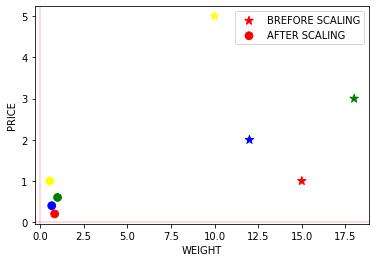

In [5]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df4 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

print(df4)
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df4.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

### 4. Robust Scaler
---

          WEIGHT     PRICE
Orange  0.352941 -0.857143
Apple   1.058824  0.285714
Banana -0.352941 -0.285714
Grape  -0.823529  1.428571


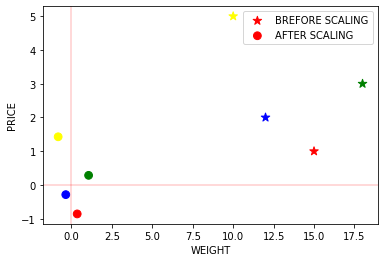

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df3 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
print(df3)

ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df3.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

           WEIGHT  PRICE
Orange         15      1
Apple          18      3
Banana         12      2
Grape          10      5
Jackfruit      50     20
             WEIGHT     PRICE
Orange    -0.406745 -0.740143
Apple     -0.203372 -0.455473
Banana    -0.610117 -0.597808
Grape     -0.745698 -0.170802
Jackfruit  1.965932  1.964226
             WEIGHT     PRICE
Orange     0.000000 -0.666667
Apple      0.500000  0.000000
Banana    -0.500000 -0.333333
Grape     -0.833333  0.666667
Jackfruit  5.833333  5.666667


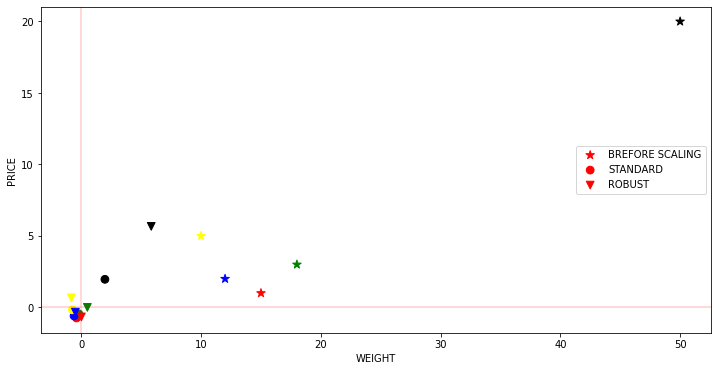

In [ ]:
#Let’s now see what happens if we introduce an outlier and 
#see the effect of scaling using Standard Scaler and Robust Scaler (a circle shows outlier).

dfr = pd.DataFrame({'WEIGHT': [15, 18, 12,10,50],
                   'PRICE': [1,3,2,5,20]},
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
print(dfr)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df21 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
print(df21)

ax = dfr.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow','black'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df21.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow','black'],
                 marker = 'o',s=60,label='STANDARD', ax = ax,figsize=(12,6))


from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df31 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])

print(df31)
df31.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow','black'],
                 marker = 'v',s=60,label='ROBUST', ax = ax,figsize=(12,6))
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);



### 5.Quantile Transformer scaler (Rank scaler)
---

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5
--------------------
          WEIGHT     PRICE
Orange  0.666667  0.000000
Apple   1.000000  0.666667
Banana  0.333333  0.333333
Grape   0.000000  1.000000


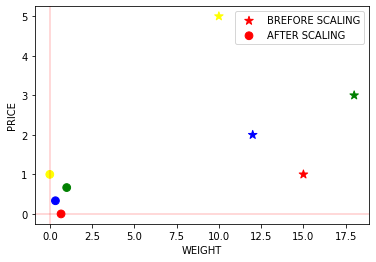

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
df6 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
print(df)
print('--------------------')
print(df6)
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df6.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax,figsize=(6,4))
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

### 6.Power Transformer scaler
---

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


          WEIGHT     PRICE
Orange  0.666667  0.000000
Apple   1.000000  0.666667
Banana  0.333333  0.333333
Grape   0.000000  1.000000


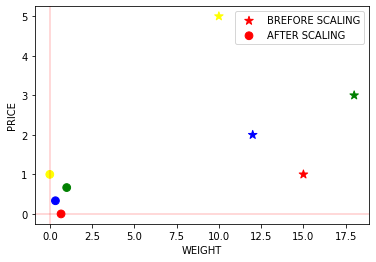

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
df6 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
print(df6)

ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df6.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax,figsize=(6,4))
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

### 7. Unit Vector scaler
---

* MedInc: median income in block

* HouseAge: median house age in block

* AveRooms: average number of rooms

* AveBedrms: average number of bedrooms

* Population: block population

* AveOccup: average house occupancy

* Latitude: house block latitude

* Longitude: house block longitude

In [ ]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
X = X_full[:, [0, 5]]
X

array([[8.3252    , 2.55555556],
       [8.3014    , 2.10984183],
       [7.2574    , 2.80225989],
       ...,
       [1.7       , 2.3256351 ],
       [1.8672    , 2.12320917],
       [2.3886    , 2.61698113]])

In [ ]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
import pandas as pd
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


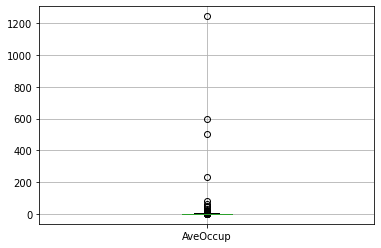

In [ ]:
df.boxplot(column=['AveOccup'])

In [ ]:
df[df.AveOccup>10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
91,0.8668,52.0,2.443182,0.988636,904.0,10.272727,37.80,-122.28
270,3.8750,33.0,3.021277,0.659574,575.0,12.234043,37.78,-122.18
1039,4.3029,16.0,6.090592,1.121951,4930.0,17.177700,38.42,-120.97
1067,3.4191,52.0,4.530612,0.816327,1107.0,11.295918,39.73,-121.85
1617,11.7064,17.0,9.361702,1.127660,1722.0,12.212766,37.84,-122.08
2511,4.6250,36.0,24.500000,3.500000,28.0,14.000000,36.51,-119.54
2723,3.4107,13.0,5.156250,1.125000,822.0,12.843750,32.75,-115.50
2899,1.9125,35.0,2.926829,0.853659,477.0,11.634146,35.37,-119.01
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51
4479,3.5769,41.0,4.940000,1.100000,925.0,18.500000,34.07,-118.16
